In [1]:
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

# 원본 클로로필 농도 값을 로드
original_chlorophyll_values = np.load('/home/juneyonglee/Desktop/AY_ust/preprocessing/ocean_idx_arr.npy')

# MinMaxScaler를 사용하여 원본 데이터로 스케일러 피팅
scaler = MinMaxScaler()
scaler.fit(original_chlorophyll_values.reshape(-1, 1))

# 복원된 이미지들이 있는 디렉터리 경로 리스트
restored_image_dirs = [
    # '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/10/recon',
    '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/recon',
    '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/30/recon',
    '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/40/recon',
    '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/50/recon'
]

# 각 경로에 대해 chl_concentration 폴더를 생성하고 이미지 처리
def process_and_save_image(restored_image_path, save_path):
    restored_img = cv2.imread(restored_image_path, cv2.IMREAD_GRAYSCALE)
    
    if restored_img is None:
        print(f"Error: The file at path {restored_image_path} could not be read.")
        return False
    
    # 이미지를 float32 형식으로 변환 (스케일링을 위해)
    restored_img = restored_img.astype(np.float32)

    # 이미지를 0-1 사이 값으로 스케일링 (예: 8비트 이미지의 경우 0-255를 0-1로 변환)
    restored_img /= 255.0

    # 예측 값을 역변환하여 원래의 클로로필 농도 값으로 변환
    restored_chlorophyll_values = scaler.inverse_transform(restored_img.reshape(-1, 1)).reshape(restored_img.shape)

    # 결과 확인 및 저장
    plt.imshow(restored_chlorophyll_values, cmap='viridis')
    plt.colorbar(label='Chlorophyll-a concentration (mg/m³)')
    plt.title(f'Restored Chlorophyll-a Concentration: {os.path.basename(restored_image_path)}')
    plt.savefig(save_path, dpi=300)  # 이미지 저장
    plt.close()

    print(f"Processed and saved: {save_path}")
    return True

for restored_image_dir in restored_image_dirs:
    output_dir = os.path.join(os.path.dirname(restored_image_dir), 'chl_concentration')

    # 결과 저장 디렉터리 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 디렉터리에 있는 모든 이미지 파일을 처리
    for img_file in os.listdir(restored_image_dir):
        if img_file.endswith('.png'):
            restored_image_path = os.path.join(restored_image_dir, img_file)
            save_path = os.path.join(output_dir, img_file)
            process_and_save_image(restored_image_path, save_path)

    print(f"All images processed and saved for directory: {restored_image_dir}")

    # 저장된 이미지들을 열어 확인하고, 잘 저장되지 않은 이미지를 다시 처리
    for img_file in os.listdir(output_dir):
        if img_file.endswith('.png'):
            save_path = os.path.join(output_dir, img_file)
            try:
                # 저장된 이미지를 다시 열어 확인
                check_img = cv2.imread(save_path, cv2.IMREAD_GRAYSCALE)
                if check_img is None or check_img.size == 0:
                    print(f"File {img_file} not properly saved. Retrying...")
                    restored_image_path = os.path.join(restored_image_dir, img_file)
                    process_and_save_image(restored_image_path, save_path)
            except Exception as e:
                print(f"Error opening file {img_file}: {e}")

    print(f"Verification and reprocessing completed for directory: {output_dir}")


Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_237.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_1466.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_3247.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_2277.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_3866.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_4305.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentration/img_3850.png
Processed and saved: /home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/20/chl_concentratio

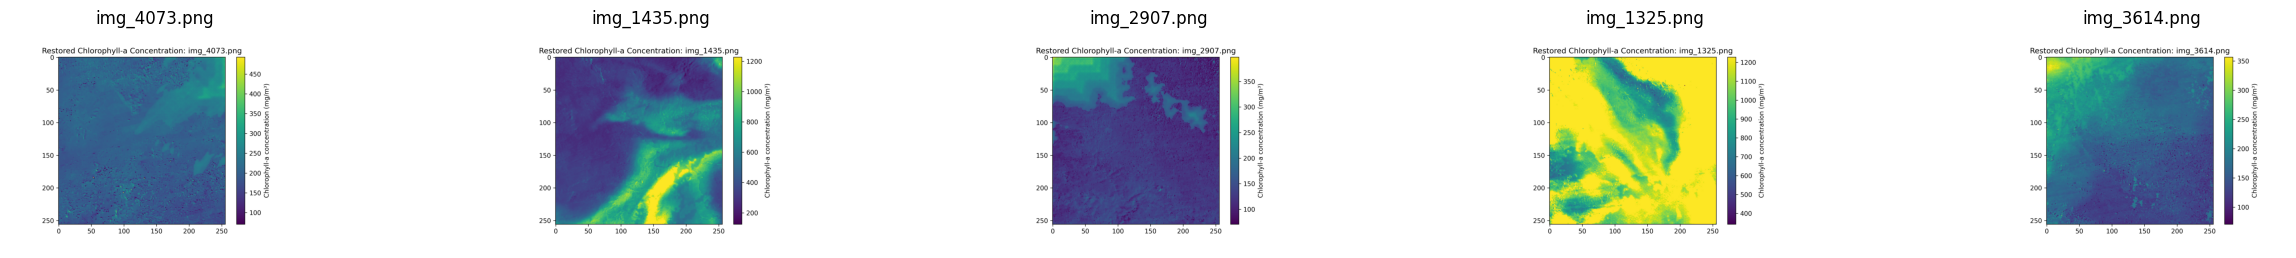

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def get_random_pngs(directory, count=10):
    # 디렉터리 내의 모든 파일 리스트를 가져옵니다
    all_files = os.listdir(directory)
    
    # PNG 파일만 필터링합니다
    png_files = [file for file in all_files if file.lower().endswith('.png')]
    
    # PNG 파일이 10개 미만일 경우, 모든 파일을 출력합니다
    if len(png_files) < count:
        count = len(png_files)
    
    # 랜덤하게 10개의 PNG 파일을 선택합니다
    random_pngs = random.sample(png_files, count)
    
    return random_pngs

def plot_random_pngs(directory, count=5):
    random_png_files = get_random_pngs(directory, count)
    
    # 플롯 설정: 2행 5열
    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    
    for ax, file in zip(axes.flatten(), random_png_files):
        image_path = os.path.join(directory, file)
        image = Image.open(image_path)
        ax.imshow(image)
        ax.set_title(file)
        ax.axis('off')
    
    # 사용되지 않은 축을 비활성화
    for i in range(len(random_png_files), 10):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()


# 저장된 이미지들이 있는 디렉터리 경로
directory_path = '/home/juneyonglee/Desktop/AY_ust/model/results/ust_chl_4_perfect/600000/10/chl_concentration'
plot_random_pngs(directory_path)
